In [47]:
import pandas as pd
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [48]:
# Step 1: Load the dataset
df = pd.read_csv('CVD_cleaned.csv')

In [49]:
# Step 2: Inspect the dataset
print("First few rows of the dataset:")
print(df.head())
print("\nData types of the columns:")
print(df.info())

First few rows of the dataset:
  General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  

In [50]:
# Step 3: Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nCategorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']
Numerical Columns: ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


In [51]:
# Step 4: Handle missing values
print("\nMissing values in each column:")
print(df.isnull().sum())
df = df.dropna()  # Dropping rows with missing values

# Step 5: Encode categorical variables
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


Missing values in each column:
General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


In [52]:
# Step 6: Sample a fraction of the dataset (for faster execution)
df_sample = df.sample(frac=0.1, random_state=42)  # Use 10% of the data
data_sample = df_sample.to_numpy()

In [53]:
# Step 7: Get the indices of categorical columns for the sampled DataFrame
categorical_indices_sample = [df_sample.columns.get_loc(col) for col in categorical_columns]


In [54]:
# Step 8: Specify the number of clusters and fit the K-Prototypes model on the sample
n_clusters = 3
kproto = KPrototypes(n_clusters=n_clusters, init='random', random_state=42, max_iter=10)  # Changed init and max_iter
clusters_sample = kproto.fit_predict(data_sample, categorical=categorical_indices_sample)

In [55]:
# Step 9: Add cluster labels to the sampled DataFrame
df_sample['cluster'] = clusters_sample

In [56]:
# Step 10: Analyze clusters on the sampled data
print("\nCluster summary (sampled data):")
cluster_summary_sample = df_sample.groupby('cluster').mean()
print(cluster_summary_sample)


Cluster summary (sampled data):
         General_Health   Checkup  Exercise  Heart_Disease  Skin_Cancer  \
cluster                                                                   
0              2.299598  3.513268  0.727513       0.094658     0.086272   
1              2.237704  3.568396  0.855285       0.071162     0.106443   
2              2.285714  3.498935  0.767801       0.076367     0.097282   

         Other_Cancer  Depression  Diabetes  Arthritis       Sex  \
cluster                                                            
0            0.084204    0.213670  0.431936   0.356462  0.723722   
1            0.099865    0.185528  0.280610   0.323217  0.387801   
2            0.100058    0.197082  0.248338   0.310955  0.381318   

         Age_Category  Height_(cm)  Weight_(kg)        BMI  Smoking_History  \
cluster                                                                       
0            6.233544   177.289374   107.439808  34.458501         0.445146   
1            

In [57]:
# Display counts of categorical features in each cluster for the sampled data
for col in categorical_columns:
    print(f"\nCounts of {col} in each cluster (sampled data):")
    print(df_sample.groupby('cluster')[col].value_counts())


Counts of General_Health in each cluster (sampled data):
cluster  General_Health
0        2                 3193
         4                 2777
         1                 1252
         0                 1059
         3                  424
1        4                 2564
         2                 1778
         0                 1589
         1                  559
         3                  199
2        4                 5838
         2                 4371
         0                 3034
         1                 1715
         3                  533
Name: count, dtype: int64

Counts of Checkup in each cluster (sampled data):
cluster  Checkup
0        4           6782
         2           1016
         3            459
         0            402
         1             46
1        4           5310
         2            765
         3            357
         0            229
         1             28
2        4          11877
         2           1935
         3            921
      

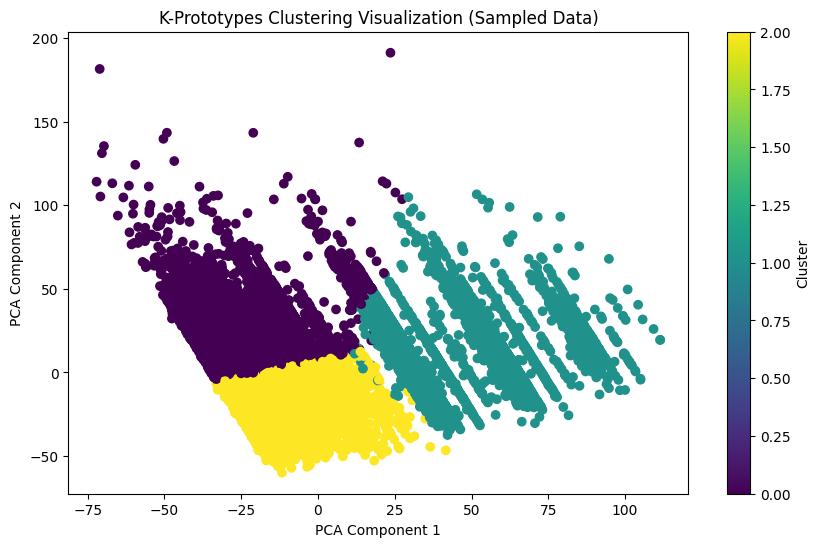

In [58]:
# Step 11: Visualize clusters
pca = PCA(n_components=2)
reduced_data_sample = pca.fit_transform(data_sample)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data_sample[:, 0], reduced_data_sample[:, 1], c=clusters_sample, cmap='viridis', marker='o')
plt.title('K-Prototypes Clustering Visualization (Sampled Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [59]:
# Step 12: (Optional) Fit the model on the entire dataset
# Ensure the original DataFrame is encoded properly
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [60]:
# Prepare the full dataset for clustering
data_full = df.to_numpy()
categorical_indices_full = [df.columns.get_loc(col) for col in categorical_columns]

In [61]:
# Fit the K-Prototypes model on the full dataset
clusters_full = kproto.fit_predict(data_full, categorical=categorical_indices_full)


In [62]:
# Add cluster labels to the original DataFrame
df['cluster'] = clusters_full

In [63]:
# Analyze the clusters on the full dataset
print("\nCluster summary (full dataset):")
cluster_summary_full = df.groupby('cluster').mean()
print(cluster_summary_full)


Cluster summary (full dataset):
         General_Health   Checkup  Exercise  Heart_Disease  Skin_Cancer  \
cluster                                                                   
0              2.244901  3.563003  0.857887       0.070272     0.107634   
1              2.270600  3.496228  0.769218       0.076019     0.098293   
2              2.300537  3.512747  0.721062       0.098187     0.086659   

         Other_Cancer  Depression  Diabetes  Arthritis       Sex  \
cluster                                                            
0            0.099875    0.180412  0.275818   0.321015  0.392751   
1            0.100146    0.198521  0.252531   0.310557  0.385589   
2            0.087902    0.219666  0.437615   0.363360  0.729915   

         Age_Category  Height_(cm)  Weight_(kg)        BMI  Smoking_History  \
cluster                                                                       
0            6.723971   169.411787    78.656070  27.369913         0.332956   
1            

In [64]:
# Display counts of categorical features in each cluster for the full dataset
for col in categorical_columns:
    print(f"\nCounts of {col} in each cluster (full dataset):")
    print(df.groupby('cluster')[col].value_counts())


Counts of General_Health in each cluster (full dataset):
cluster  General_Health
0        4                 25466
         2                 17781
         0                 15381
         1                  5781
         3                  1834
1        4                 58145
         2                 46409
         0                 31050
         1                 16959
         3                  5556
2        2                 31174
         4                 26784
         1                 13070
         0                  9523
         3                  3941
Name: count, dtype: int64

Counts of Checkup in each cluster (full dataset):
cluster  Checkup
0        4           52456
         2            7939
         3            3365
         0            2256
         1             227
1        4          121137
         2           19701
         3            9364
         0            7139
         1             778
2        4           65778
         2            9573
     